In [1]:
import llh_defs.poisson as poisson
import numpy
import scipy.special
import pylab
import llh_defs.multinomial as multinomial

### two bins with uneven pseudo MonteCarlo weight distribution -> plot finite-sample binomial distribution as special case of finite-sample 
### multinomial.. just because it is possible

# sum weights first bin: 4.0  - 3 weighted events total
weights_bin1=numpy.array([1.0,0.2,2.8])

# sum weights second bin: 2.0 - 4 weighted events total
weights_bin2=numpy.array([0.5,0.5,0.5, 0.5])

avg_w_1=sum(weights_bin1)/float(len(weights_bin1))
avg_w_2=sum(weights_bin2)/float(len(weights_bin2))

#avg_weight_list=[numpy.ones(len(weights_bin1))*avg_w_1, numpy.ones(len(weights_bin1))*avg_w_2]

In [2]:
kmax=50

## the major formulas
standard_poisson_probs=[]
equal_w_poisson_probs=[]
general_w_poisson_probs_exact=[]

## some more respresentations for the generalized Poisson llh based on different calculations that are approximate
general_w_poisson_probs_montecarlo=[]
general_w_poisson_probs_series_lowpercentage=[]
general_w_poisson_probs_series_highpercentage=[]

## Multivariate Poisson based on ??
multivariate_general_poisson_probs=[]
multivariate_mnomial_times_poisson_probs=[]

general_w_poisson_chirkin_13=[]

k1=range(kmax)

for k in k1:

    standard_poisson_probs.append(poisson.poisson_infinite_statistics(k, sum(weights_bin1)))
    equal_w_poisson_probs.append(poisson.poisson_equal_weights(k, len(weights_bin1), avg_w_1))
    general_w_poisson_probs_exact.append(poisson.poisson_general_weights_direct(k, weights_bin1))
    
    poisson.poisson_general_weights_direct(k, weights_bin1)
    poisson.poisson_general_weights(k, weights_bin1, lauricella_calc="exact")
    
    general_w_poisson_probs_montecarlo.append(poisson.poisson_general_weights(k, weights_bin1, lauricella_calc="montecarlo"))
    general_w_poisson_probs_series_lowpercentage.append(poisson.poisson_general_weights_series([k], weights_bin1, [numpy.ones(len(weights_bin1))==1], percentage=0.9, prior_factor=0.0,verbose=False))
    general_w_poisson_probs_series_highpercentage.append(poisson.poisson_general_weights_series([k], weights_bin1, [numpy.ones(len(weights_bin1))==1], percentage=0.999, prior_factor=0.0,verbose=False))
    
    general_w_poisson_chirkin_13.append(poisson.poisson_general_weights_chirkin_13(numpy.array([k]), weights_bin1, [numpy.ones(len(weights_bin1))==1]))

    



        

A comparison of the standard Poisson, the extended Poisson for equal weights (assuming avg. in the bin), and the general Poisson formula.
The likelihoods are PDFs in the data k, i.e. they must integrate to 1.


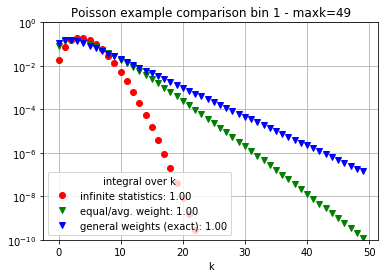

Some comparisons in time of the three formulas:
------
time standard Poisson (1000 iter) 0.0183689594269
time equal-weights generalization (1000 iter) 0.037496805191
time exact general-weights generalization (1000 iter) 52.6906580925
------
NOTE: If the exact general-weights formula (contour integral eq. 27 in paper) would not use increased precision (currently via MPMATH), it could be *MUCH* faster, nearly as fast as the other two formulas!! Good ideas required! Due to increased precision it does not use numpy functionality for example...


In [3]:
print "A comparison of the standard Poisson, the extended Poisson for equal weights (assuming avg. in the bin), and the general Poisson formula."
print "The likelihoods are PDFs in the data k, i.e. they must integrate to 1."
pylab.plot(k1, numpy.exp(standard_poisson_probs), lw=0, marker="o", color="red", label="infinite statistics: %.2f" % numpy.exp(standard_poisson_probs).sum())
pylab.plot(k1, numpy.exp(equal_w_poisson_probs), lw=0, marker="v", color="green", label="equal/avg. weight: %.2f" % numpy.exp(equal_w_poisson_probs).sum())
pylab.plot(k1, numpy.exp(general_w_poisson_probs_exact), lw=0, marker="v", color="blue", label="general weights (exact): %.2f" % numpy.exp(general_w_poisson_probs_exact).sum())


pylab.title("Poisson example comparison bin 1 - maxk=%d" % max(k1))
pylab.legend(loc="lower left", title="integral over k")
pylab.gca().set_xlabel("k")
pylab.gca().grid()
pylab.gca().semilogy()
pylab.gca().set_ylim(1e-10, 1)
pylab.show()

import timeit

setup_for_timit="""
import llh_defs.poisson as poisson
import numpy

k=50
weights_bin1=numpy.array([1.0,0.2,2.8])
num_weights=len(weights_bin1)
avg_weight=sum(weights_bin1)/float(len(weights_bin1))
"""

print "Some comparisons in time of the three formulas:"
print "------"
print "time standard Poisson (1000 iter)", timeit.timeit('poisson.poisson_infinite_statistics(k, sum(weights_bin1))', setup=setup_for_timit, number=1000)
print "time equal-weights generalization (1000 iter)", timeit.timeit('poisson.poisson_equal_weights(k, num_weights, avg_weight)', setup=setup_for_timit, number=1000)
print "time exact general-weights generalization (1000 iter)", timeit.timeit('poisson.poisson_general_weights(k, weights_bin1, lauricella_calc="exact")', setup=setup_for_timit, number=1000)
print "------"
print "NOTE: If the exact general-weights formula (contour integral eq. 27 in paper) would not use increased precision (currently via MPMATH), it could be *MUCH* faster, nearly as fast as the other two formulas!! Good ideas required! Due to increased precision it does not use numpy functionality for example..."

Comparison of different ways to calculate the generalized Poisson likelihood for general MC weights.
The series representation can adapatively control precision ... which directly is reflected in the plot in the low/highp precision curves.


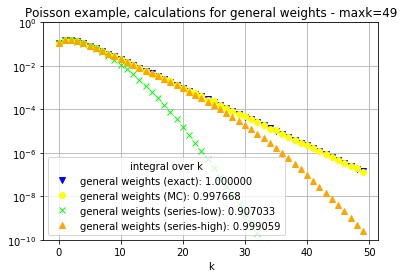

Some comparisons in time of the general-weights Poisson generalization:
-----
time exact (100 iter) 4.45846796036
time MC (100 iter) 11.3068988323
time series low (100 iter) 4.52315306664
time series high (100 iter) 16.3195002079
time series Chirkin '13 / arXiv:1304.0735 (no prob density) (100 iter) 0.00814199447632
-----
NOTE: If the exact formula (contour integral eq. 27 in paper) would not use increased precision (currently via MPMATH), it could be *MUCH* faster!! Good ideas required!


In [4]:
print "Comparison of different ways to calculate the generalized Poisson likelihood for general MC weights."
print "The series representation can adapatively control precision ... which directly is reflected in the plot in the low/highp precision curves."
pylab.plot(k1, numpy.exp(general_w_poisson_probs_exact), lw=0, marker="v", color="blue", label="general weights (exact): %.6f" % numpy.exp(general_w_poisson_probs_exact).sum())
pylab.plot(k1, numpy.exp(general_w_poisson_probs_montecarlo), lw=0, marker="o", color="yellow", label="general weights (MC): %.6f" % numpy.exp(general_w_poisson_probs_montecarlo).sum())
pylab.plot(k1, numpy.exp(general_w_poisson_probs_series_lowpercentage), lw=0, marker="x", color="lime", label="general weights (series-low): %.6f" % numpy.exp(general_w_poisson_probs_series_lowpercentage).sum())
pylab.plot(k1, numpy.exp(general_w_poisson_probs_series_highpercentage), lw=0, marker="^", color="orange", label="general weights (series-high): %.6f" % numpy.exp(general_w_poisson_probs_series_highpercentage).sum())


pylab.title("Poisson example, calculations for general weights - maxk=%d" % max(k1))
pylab.legend(loc="lower left", title="integral over k")
pylab.gca().set_xlabel("k")
pylab.gca().grid()
pylab.gca().semilogy()
pylab.gca().set_ylim(1e-10, 1)
pylab.show()


print "Some comparisons in time of the general-weights Poisson generalization:"
print "-----"
print "time exact (100 iter)", timeit.timeit('poisson.poisson_general_weights(k, weights_bin1, lauricella_calc="exact")', setup=setup_for_timit, number=100)
print "time MC (100 iter)", timeit.timeit('poisson.poisson_general_weights(k, weights_bin1, lauricella_calc="montecarlo")', setup=setup_for_timit, number=100)
print "time series low (100 iter)", timeit.timeit('poisson.poisson_general_weights_series([k], weights_bin1, [numpy.ones(len(weights_bin1))==1], percentage=0.9)', setup=setup_for_timit, number=100)
print "time series high (100 iter)", timeit.timeit('poisson.poisson_general_weights_series([k], weights_bin1, [numpy.ones(len(weights_bin1))==1], percentage=0.999)', setup=setup_for_timit, number=100)
print "time series Chirkin '13 / arXiv:1304.0735 (no prob density) (100 iter)", timeit.timeit('poisson.poisson_general_weights_chirkin_13(numpy.array([k]), weights_bin1, [numpy.ones(len(weights_bin1))==1])', setup=setup_for_timit, number=100)
print "-----"
print "NOTE: If the exact formula (contour integral eq. 27 in paper) would not use increased precision (currently via MPMATH), it could be *MUCH* faster!! Good ideas required!"

Multivariate comparison - take the two bins, standard Poisson generalization multiplied (no correlation), i.e. Poiss_bin_i*Poiss_bin_j


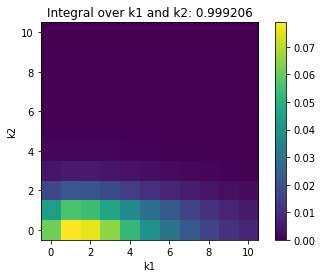

In [5]:
print "Multivariate comparison - take the two bins, standard Poisson generalization multiplied (no correlation), i.e. Poiss_bin_i*Poiss_bin_j"
kmax=20
z_array_independent=numpy.zeros(shape=(kmax+1,kmax+1))
import matplotlib

weights_bin1=numpy.array(2*[1.8])
weights_bin2=numpy.array(15*[0.05])

avg_w_1=sum(weights_bin1)/float(len(weights_bin1))
avg_w_2=sum(weights_bin2)/float(len(weights_bin2))

for k1 in range(kmax+1):
    for k2 in range(kmax+1):
        
        res=poisson.poisson_equal_weights(numpy.array([k1]), numpy.array([len(weights_bin1)]), numpy.array([avg_w_1]))+poisson.poisson_equal_weights(numpy.array([k2]), numpy.array([len(weights_bin2)]), numpy.array([avg_w_2]))
        #res=poisson.poisson_general_weights(k1, weights_bin1, lauricella_calc="exact")+poisson.poisson_general_weights(k2, weights_bin2, lauricella_calc="exact")
        z_array_independent[k1][k2]=numpy.exp(res)

pylab.imshow(z_array_independent.T)
pylab.colorbar()
pylab.gca().set_xlabel("k1")
pylab.gca().set_ylabel("k2")
pylab.gca().set_xlim(-0.5, 10.5)
pylab.gca().set_ylim(-0.5, 10.5)
pylab.title("Integral over k1 and k2: %.6f" % z_array_independent.sum())
pylab.show()

second definition: Multiply multinomial generalization with overall Poisson, i.e. Multinomial*Poiss_global


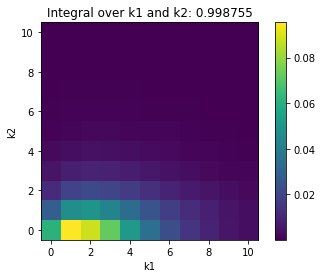

In [6]:
print "second definition: Multiply multinomial generalization with overall Poisson, i.e. Multinomial*Poiss_global"
pylab.figure()
pylab.clf()


z_array=numpy.zeros(shape=(kmax+1,kmax+1))
tot_k=kmax

for k1 in range(kmax+1):
    for k2 in range(kmax+1):
            
        mn=multinomial.log_multinomial_equal_weights(numpy.array([k1,k2]), numpy.array([len(weights_bin1), len(weights_bin2)]), numpy.array([avg_w_1, avg_w_2]), nthrows=100000, prior_factor=0,integral_type="standard_lauricella")
        res=mn+poisson.poisson_general_weights(k1+k2, numpy.array(weights_bin1.tolist()+weights_bin2.tolist()), lauricella_calc="exact") 
        z_array[k1][k2]=numpy.exp(res)
        
        

pylab.imshow(z_array.T)
pylab.colorbar()
pylab.gca().set_xlabel("k1")
pylab.gca().set_ylabel("k2")
pylab.gca().set_xlim(-0.5, 10.5)
pylab.gca().set_ylim(-0.5, 10.5)
pylab.title("Integral over k1 and k2: %.6f" % z_array.sum())
pylab.show()




Marginal distributions


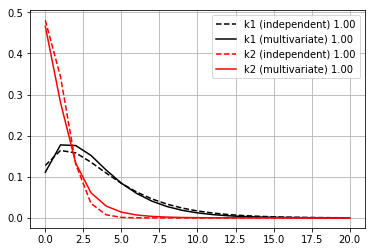

In [7]:
print "Marginal distributions"

pylab.figure()
pylab.plot(range(kmax+1), z_array_independent.sum(axis=1), color="black", ls="--",label="k1 (independent) %.2f" %  z_array_independent.sum(axis=1).sum())
pylab.plot(range(kmax+1), z_array.sum(axis=1), color="black",label="k1 (multivariate) %.2f" %  z_array.sum(axis=1).sum())

pylab.plot(range(kmax+1), z_array_independent.sum(axis=0), color="red", ls="--", label="k2 (independent) %.2f" %  z_array_independent.sum(axis=0).sum())
pylab.plot(range(kmax+1), z_array.sum(axis=0), color="red", label="k2 (multivariate) %.2f" %  z_array.sum(axis=0).sum())
pylab.legend(loc="upper right")
pylab.grid()
pylab.show()

Ratios of conditional distributions, i.e. p(k1;k2=0)/p(k1;k2=1) and so on. If k1 and k2 are indpendent random variables, the ratios of these conditionals are flat!


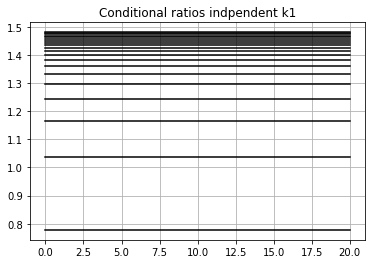

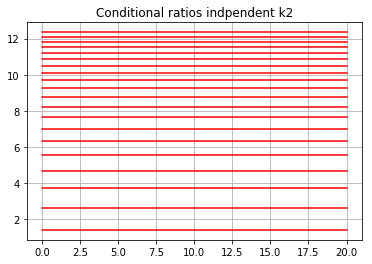

In [8]:
print "Ratios of conditional distributions, i.e. p(k1;k2=0)/p(k1;k2=1) and so on. If k1 and k2 are indpendent random variables, \
the ratios of these conditionals are flat!"


pylab.figure()
for ind in range(kmax):
    pylab.plot(range(kmax+1), z_array_independent[ind,:]/z_array_independent[ind+1,:], color="black")
pylab.title("Conditional ratios indpendent k1")
pylab.grid()
pylab.show()


pylab.figure()
for ind in range(kmax):
    pylab.plot(range(kmax+1), z_array_independent[:,ind]/z_array_independent[:,ind+1], color="red")
pylab.title("Conditional ratios indpendent k2")
pylab.grid()
pylab.show()


For the multivariate construction, i.e. Global Poisson * Multinomial extension, the resulting Poisson distribution is a correlated multivariate Poisson, because the conditional ratios are not flat! The noise comes from the numerical approximation of the extended Multinomial formula.


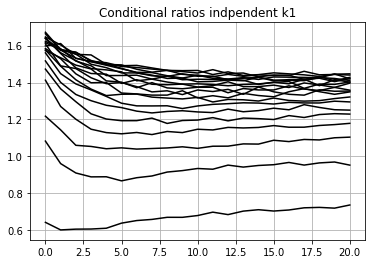

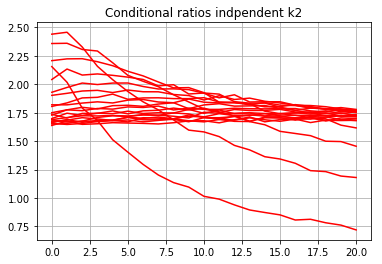

In [9]:
print "For the multivariate construction, i.e. Global Poisson * Multinomial extension, the resulting Poisson distribution \
is a correlated multivariate Poisson, because the conditional ratios are not flat! The noise comes from the numerical approximation of the extended Multinomial formula."
pylab.figure()
for ind in range(kmax):
    pylab.plot(range(kmax+1), z_array[ind,:]/z_array[ind+1,:], color="black")
pylab.title("Conditional ratios indpendent k1")
pylab.grid()
pylab.show()


pylab.figure()
for ind in range(kmax):
    pylab.plot(range(kmax+1), z_array[:,ind]/z_array[:,ind+1], color="red")
pylab.title("Conditional ratios indpendent k2")
pylab.grid()
pylab.show()

In [10]:


for k1 in range(kmax+1):
    for k2 in range(kmax+1):
            
        mn=multinomial.log_multinomial_equal_weights(numpy.array([k1,k2]), numpy.array([len(weights_bin1), len(weights_bin2)]), numpy.array([avg_w_1, avg_w_2]), nthrows=100000, prior_factor=0,integral_type="standard_lauricella")
        res=mn+poisson.poisson_infinite_statistics(k1+k2, weights_bin1.sum()+weights_bin2.sum()) 
        z_array[k1][k2]=numpy.exp(res)



        

*Multivariate* construction of Equal-weights multinomial with standard Poisson likelihood. Again 2d plot and 1-d ratio of marginals.


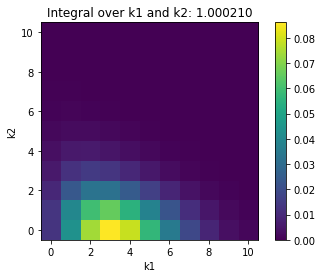

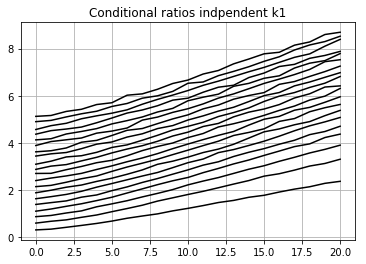

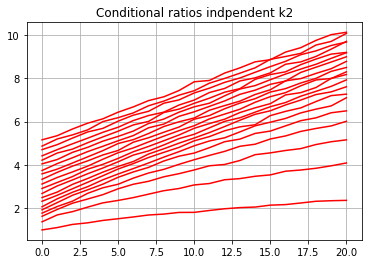

In [11]:
print "*Multivariate* construction of Equal-weights multinomial with standard Poisson likelihood. Again 2d plot and 1-d ratio of marginals."
pylab.imshow(z_array.T)
pylab.colorbar()
pylab.gca().set_xlabel("k1")
pylab.gca().set_ylabel("k2")
pylab.gca().set_xlim(-0.5, 10.5)
pylab.gca().set_ylim(-0.5, 10.5)
pylab.title("Integral over k1 and k2: %.6f" % z_array.sum())
pylab.show()

pylab.figure()
for ind in range(kmax):
    pylab.plot(range(kmax+1), z_array[ind,:]/z_array[ind+1,:], color="black")
pylab.title("Conditional ratios indpendent k1")
pylab.grid()
pylab.show()


pylab.figure()
for ind in range(kmax):
    pylab.plot(range(kmax+1), z_array[:,ind]/z_array[:,ind+1], color="red")
pylab.title("Conditional ratios indpendent k2")
pylab.grid()
pylab.show()

In [12]:
for k1 in range(kmax+1):
    for k2 in range(kmax+1):
            
        mn=multinomial.log_multinomial_equal_weights(numpy.array([k1,k2]), numpy.array([len(weights_bin1), len(weights_bin2)]), numpy.array([avg_w_1, avg_w_2]), nthrows=100000, prior_factor=0,integral_type="standard_lauricella")
        res=mn+poisson.poisson_equal_weights(numpy.array([k1+k2]), numpy.array([len(weights_bin1)+len(weights_bin2)]), numpy.array([0.5*avg_w_1+0.5*avg_w_2])) 
        z_array[k1][k2]=numpy.exp(res)



*Multivariate* construction of equal-weights Multinomial with Equal weights Poisson .. yet again different.


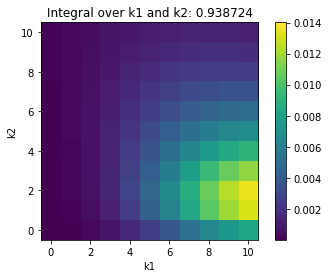

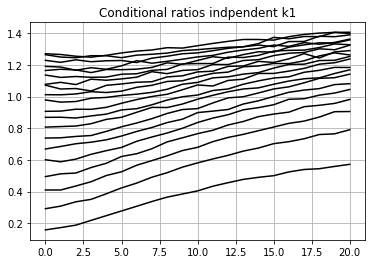

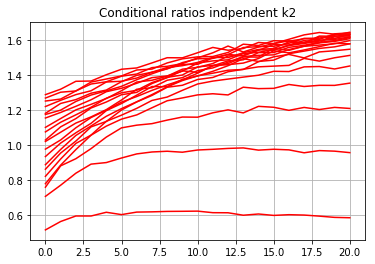

In [13]:
print "*Multivariate* construction of equal-weights Multinomial with Equal weights Poisson .. yet again different."
pylab.imshow(z_array.T)
pylab.colorbar()
pylab.gca().set_xlabel("k1")
pylab.gca().set_ylabel("k2")
pylab.gca().set_xlim(-0.5, 10.5)
pylab.gca().set_ylim(-0.5, 10.5)
pylab.title("Integral over k1 and k2: %.6f" % z_array.sum())
pylab.show()

pylab.figure()
for ind in range(kmax):
    pylab.plot(range(kmax+1), z_array[ind,:]/z_array[ind+1,:], color="black")
pylab.title("Conditional ratios indpendent k1")
pylab.grid()
pylab.show()


pylab.figure()
for ind in range(kmax):
    pylab.plot(range(kmax+1), z_array[:,ind]/z_array[:,ind+1], color="red")
pylab.title("Conditional ratios indpendent k2")
pylab.grid()
pylab.show()
